In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
# Load the merged
data = pd.read_csv('/content/drive/MyDrive/Study_Based_Recommendation/data_merged.csv')

In [3]:
# Automatically select only numerical columns for clustering
num_df = data.select_dtypes(include=[np.number])

print("Numerical Features:\n", num_df.columns)

# Fill missing values (if any)
num_df = num_df.fillna(num_df.mean())

print("\n✅ Numerical data prepared for clustering")
display(num_df.head())

Numerical Features:
 Index(['Student_ID', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion'],
      dtype='object')

✅ Numerical data prepared for clustering


,Student_ID,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,15,16,2,20
1,2,20,20,3,25
2,3,10,7,0,30
3,4,30,25,5,35
4,5,40,50,12,50


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

print("✅ Data Standardized Successfully")
pd.DataFrame(scaled_data, columns=num_df.columns).head()


✅ Data Standardized Successfully


,Student_ID,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,-1.728446,-1.033429,-1.174075,-1.351167,-0.843326
1,-1.721229,-0.870813,-1.053029,-1.313549,-0.662225
2,-1.714012,-1.196046,-1.446426,-1.426401,-0.481125
3,-1.706795,-0.545579,-0.901723,-1.238315,-0.300024
4,-1.699579,-0.220346,-0.145191,-0.974994,0.243279


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

print("✅ PCA Transformation Done")
pca_df.head()


✅ PCA Transformation Done


,PCA1,PCA2
0,-2.657307,0.549003
1,-2.433051,0.667766
2,-2.802467,0.832438
3,-2.030712,0.919084
4,-1.169053,1.231084


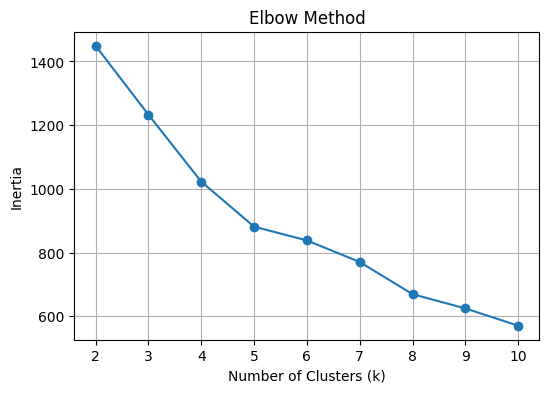

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [7]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"K={k} → Silhouette Score={score:.3f}")


K=2 → Silhouette Score=0.339
K=3 → Silhouette Score=0.257
K=4 → Silhouette Score=0.256
K=5 → Silhouette Score=0.265
K=6 → Silhouette Score=0.232


In [12]:
optimal_k = 3

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans_final.fit_predict(scaled_data)

print("✅ Clustering Done with K =", optimal_k)
data.head()



✅ Clustering Done with K = 3


,Student_ID,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class,Cluster
0,1,M,KW,KuwaIT,lowerlevel,G-04,A,Father,Yes,Good,IT,F,15,16,2,20,Under-7,M,2
1,2,M,KW,KuwaIT,lowerlevel,G-04,A,Father,Yes,Good,IT,F,20,20,3,25,Under-7,M,2
2,3,M,KW,KuwaIT,lowerlevel,G-04,A,Father,No,Bad,IT,F,10,7,0,30,Above-7,L,2
3,4,M,KW,KuwaIT,lowerlevel,G-04,A,Father,No,Bad,IT,F,30,25,5,35,Above-7,L,2
4,5,M,KW,KuwaIT,lowerlevel,G-04,A,Father,No,Bad,IT,F,40,50,12,50,Above-7,M,2


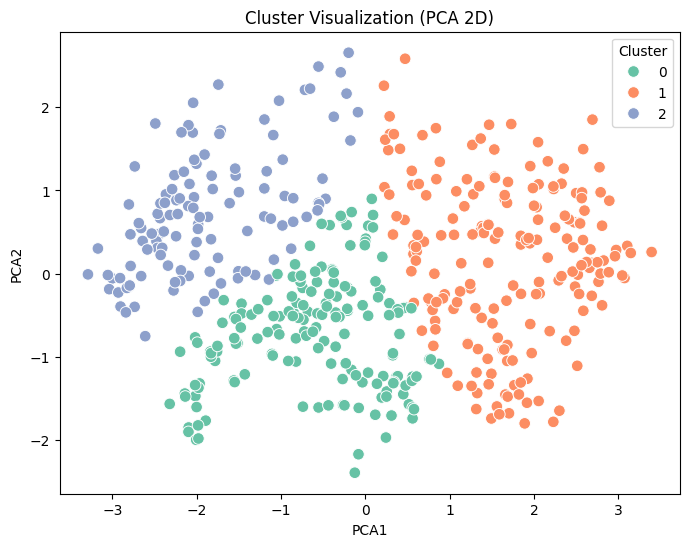

In [14]:
import seaborn as sns

pca_df['Cluster'] = data['Cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2', s=70)
plt.title("Cluster Visualization (PCA 2D)")
plt.show()



In [16]:
cluster_summary = data.groupby('Cluster')[num_df.columns].mean()
print(cluster_summary)


         Student_ID  raisedhands  VisITedResources  AnnouncementsView  \
Cluster                                                                 
0        284.154762    36.226190         49.922619          26.154762   
1        293.031088    73.974093         81.647668          62.487047   
2         93.672269    17.554622         18.134454          14.680672   

         Discussion  
Cluster              
0         24.898810  
1         59.875648  
2         42.327731  


/tmp/ipython-input-1109806963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='raisedhands', data=data, palette='Set2')


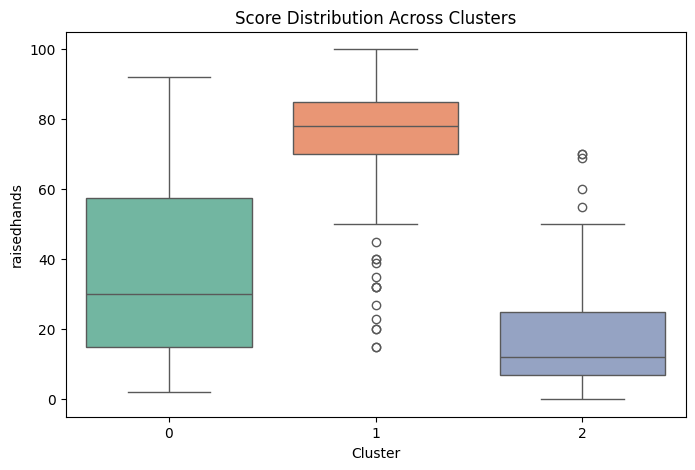

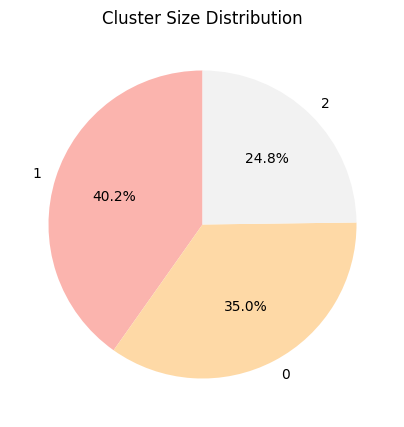

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='raisedhands', data=data, palette='Set2')
plt.title("Score Distribution Across Clusters")
plt.show()

plt.figure(figsize=(5,5))
data['Cluster'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title("Cluster Size Distribution")
plt.ylabel("")
plt.show()


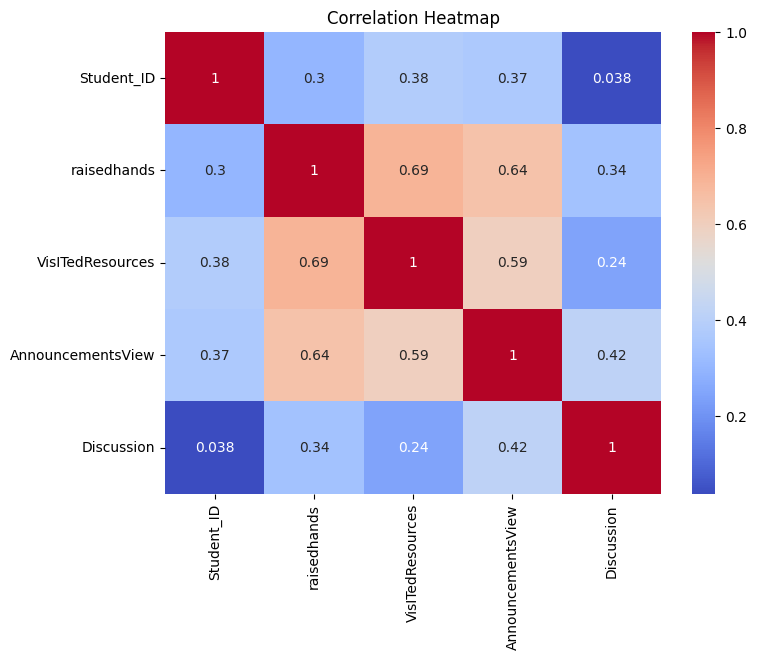

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [22]:
data.to_csv("clustered_student_data.csv", index=False)
print("✅ Clustered dataset saved as clustered_student_data.csv")


✅ Clustered dataset saved as clustered_student_data.csv


<Figure size 1000x600 with 0 Axes>

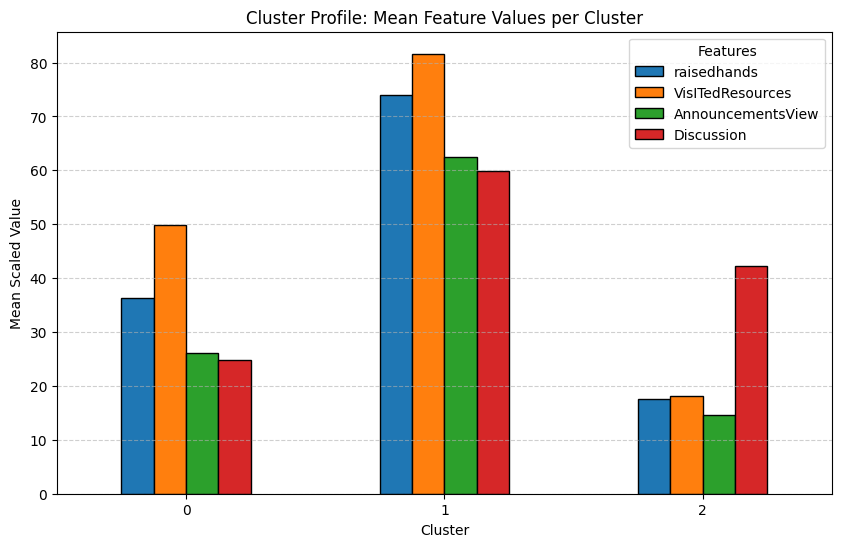

In [24]:
# ✅ Cluster Profile Bar Plot

# Remove non-feature columns such as Student_ID if present
feature_cols = [col for col in num_df.columns if col not in ['Student_ID', 'PC1', 'PC2', 'Cluster']]

cluster_profile = data.groupby('Cluster')[feature_cols].mean().reset_index()

plt.figure(figsize=(10,6))
cluster_profile.set_index('Cluster').plot(kind='bar', figsize=(10,6), edgecolor='black')

plt.title("Cluster Profile: Mean Feature Values per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Scaled Value")
plt.xticks(rotation=0)
plt.legend(title="Features")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()
